# [UBFC-Phys2](https://ieee-dataport.org/open-access/ubfc-phys-2)
[paper](https://sci-hub.ru/https://ieeexplore.ieee.org/abstract/document/9346017/)

In [1]:
from __future__ import annotations

import os
import weakref
import numpy as np
import heartpy as hp
import matplotlib.pyplot as plt

from typing import Any

In [21]:
class SubjectTest:
    def __init__(
        self,
        subject: Subject,
        test_id: int,
        data_filepath: str,
        sample_rate: float,
    ):
        self.subject = weakref.ref(subject)
        self.test: int = test_id
        with open(data_filepath.format(s_id=subject.id, test_id=test_id)) as f:
            d = f.read()
        self.data: np.array = np.fromiter(map(float, d.splitlines()), float)
        self.sample_rate: float = sample_rate
        self._working_data, self._measures = None, None
        self._rr_list_cor = None

    def _process(self):
        if self._working_data is not None:
            return
        self._working_data, self._measures = hp.process(
            self.data, self.sample_rate
        )

    @property
    def working_data(self) -> dict[str, Any]:
        if self._working_data is not None:
            return self._working_data
        self._process()
        return self._working_data

    @property
    def measures(self) -> dict[str, Any]:
        if self._measures is not None:
            return self._measures
        self._process()
        return self._measures

    @property
    def rr_list_cor(self) -> np.ndarray:
        if self._rr_list_cor is not None:
            return self._rr_list_cor
        self._rr_list_cor = np.array(self.working_data.get("RR_list_cor"))
        return self._rr_list_cor

    def __str__(self):
        return f"s{self.subject().id}t{self.test}"

In [22]:
class Subject:
    def __init__(self, s_id: int, data_dir: str, sample_rate):
        self.id = s_id
        with open(os.path.join(data_dir, f"info_s{s_id}.txt")) as f:
            self.test_type = f.readlines()[2].strip()
        self.tests = [
            SubjectTest(
                subject=self,
                test_id=test_id + 1,
                data_filepath=os.path.join(
                    data_dir, "bvp_s{s_id}_T{test_id}.csv"
                ),
                sample_rate=sample_rate,
            )
            for test_id in range(3)
        ]

    @property
    def test_1(self) -> SubjectTest:
        return self.tests[0]

    @property
    def test_2(self) -> SubjectTest:
        return self.tests[1]

    @property
    def test_3(self) -> SubjectTest:
        return self.tests[2]

In [23]:
class Dataset:
    def __init__(
        self, path, subject_prefix: str = "s", sample_rate: float = 64.0
    ):
        self.sample_rate: float = sample_rate
        self.subjects_tests: dict[int, Subject] = {}
        condition = (
            lambda x: x[0] == subject_prefix
            and x[1:].isdigit()
            and os.path.isdir(os.path.join(path, x))
        )
        subjects_paths = filter(condition, os.listdir(path))
        for subject_path in subjects_paths:
            s_id = int(subject_path[1:])
            s_data_path = os.path.join(path, subject_path)
            self.subjects_tests.update(
                {s_id: Subject(s_id, s_data_path, sample_rate=64.0)}
            )

    def get(self, subject_id) -> Subject:
        return self.subjects_tests.get(subject_id)

In [24]:
dataset = Dataset(os.path.join("..", "data", "ubfc-phys-2", "subjects"))

In [25]:
ctrl_test = [s.test_type for s in dataset.subjects_tests.values()]
ctrl_count = ctrl_test.count("ctrl")
print("ctrl:", ctrl_count, "; test:", len(ctrl_test) - ctrl_count)

ctrl: 13 ; test: 8


In [26]:
subject_1_tests = dataset.get(1)
s1t1 = subject_1_tests.test_1

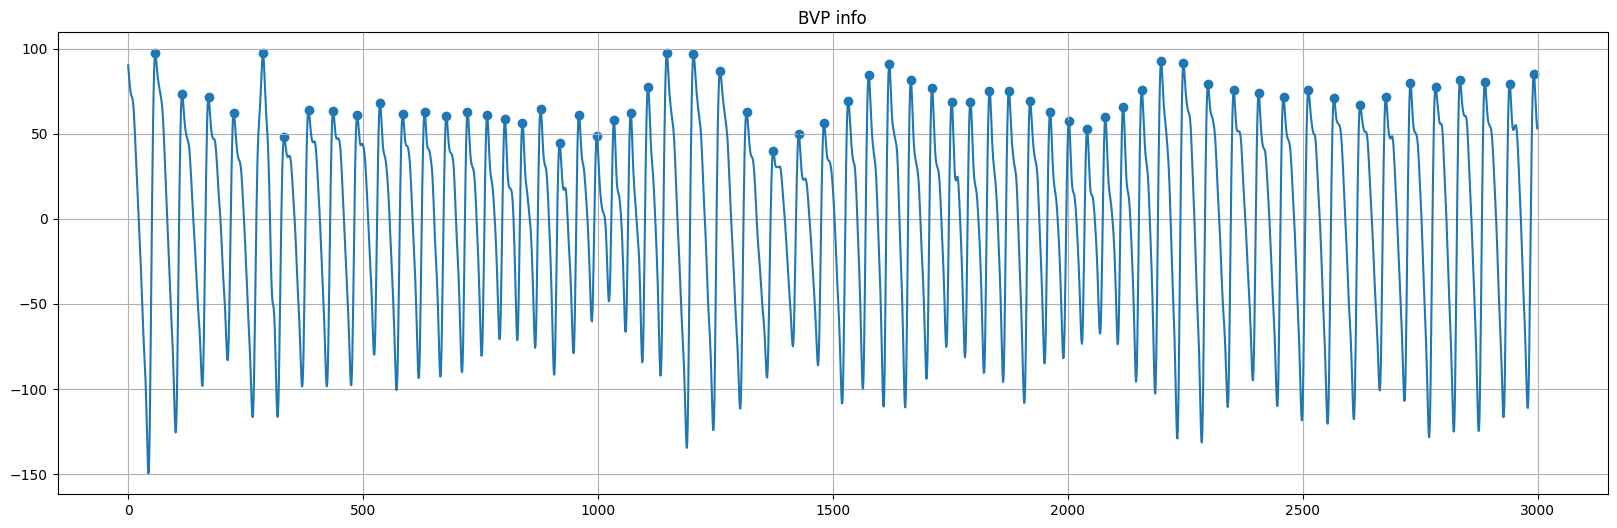

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

cropped = s1t1.working_data.get("peaklist")[
    s1t1.working_data.get("peaklist") < 3000
]
d_3 = s1t1.data[:3000]
ax.plot(d_3)
ax.scatter(cropped, d_3[cropped])

ax.set(title="BVP info")
ax.grid()

plt.show()

s1t1
s1t2
s1t3
s2t1
s2t2
s2t3
s3t1
s3t2
s3t3
s4t1
s4t2
s4t3
s5t1
s5t2
s5t3
s6t1
s6t2
s6t3
s7t1
s7t2
s7t3
s8t1
s8t2
s8t3
s9t1
s9t2


/home/dmo/Documents/human_func_state/venv/lib/python3.10/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


s9t3
s10t1
s10t2
s10t3
s11t1
s11t2
s11t3
s12t1


/home/dmo/Documents/human_func_state/venv/lib/python3.10/site-packages/numpy/ma/core.py:5288: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/home/dmo/Documents/human_func_state/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


s12t2
s12t3
s13t1
s13t2
s13t3
s14t1
s14t2
s14t3
s15t1
s15t2
s15t3
s16t1
s16t2
s16t3
s18t1
s18t2
s18t3
s20t1
s20t2
s20t3
s23t1
s23t2
s23t3
s24t1
s24t2
s24t3
s29t1


BadSignalWarning: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


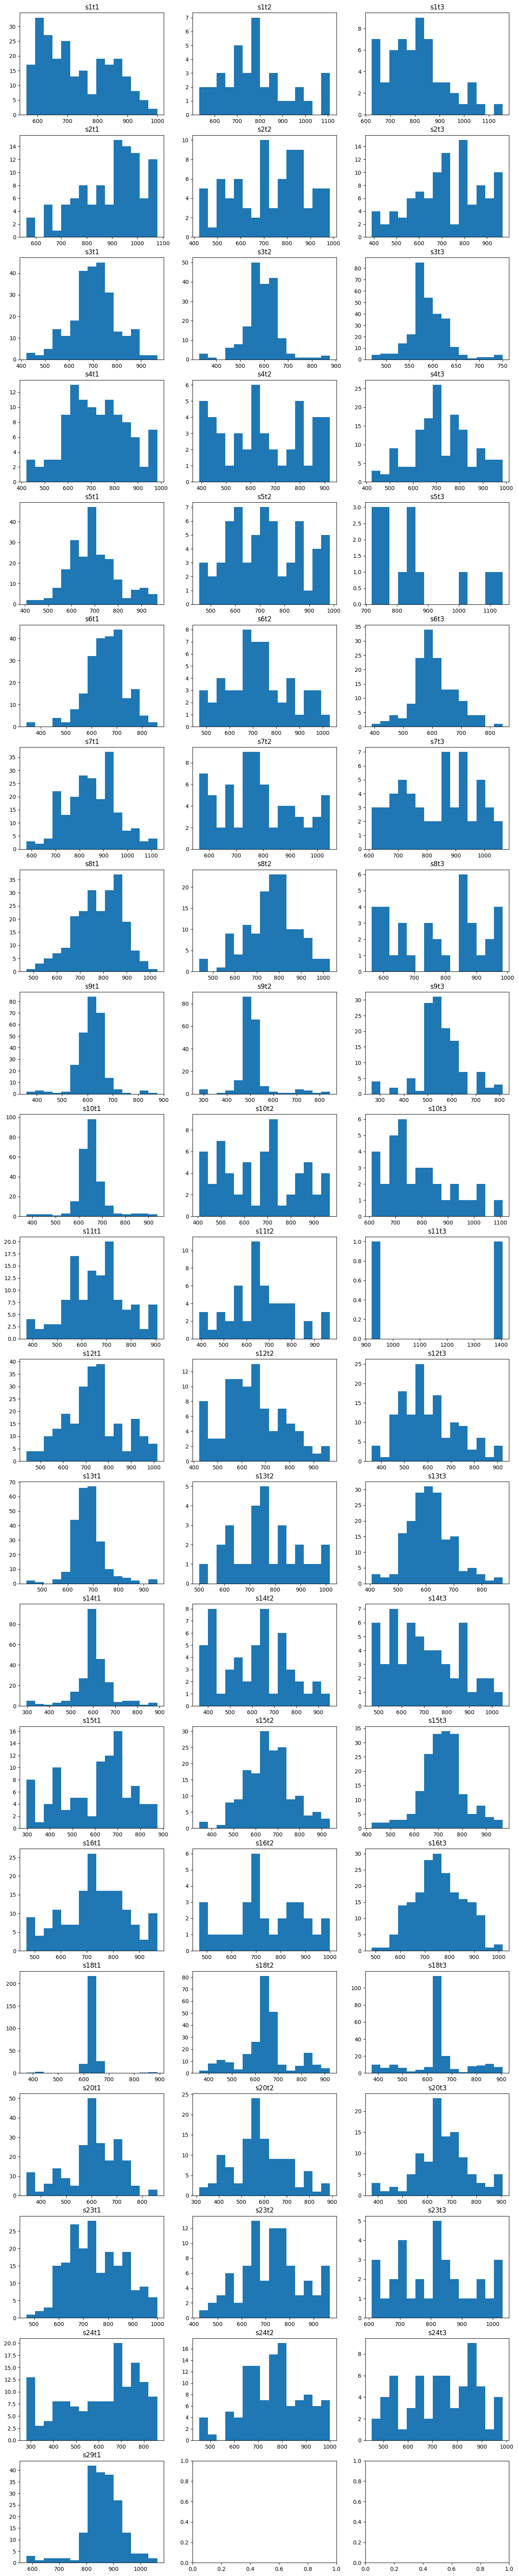

In [28]:
# RR intervals distribution
fix, ax = plt.subplots(
    len(dataset.subjects_tests),
    3,
    figsize=(16, 4 * len(dataset.subjects_tests)),
)
for j, (s_id, subject) in enumerate(
    sorted(dataset.subjects_tests.items(), key=lambda x: x[0])
):
    for i, t in enumerate(subject.tests):
        ax[j, i].hist(
            t.rr_list_cor,
            bins=15,
            range=(t.rr_list_cor.min(), t.rr_list_cor.max()),
        )
        ax[j, i].set(title=str(t))
plt.show()

---

In [29]:
tests_depends_measures = {}
for key in s1t1.measures.keys():
    tests_depends_measures[key] = {
        str(st): st.measures.get(key) for st in subject_1_tests.tests
    }

In [30]:
tests_depends_measures

{'bpm': {'s1t1': 82.04541391024496, 's1t2': 76.8, 's1t3': 74.18467583497053},
 'ibi': {'s1t1': 731.3023012552301, 's1t2': 781.25, 's1t3': 808.792372881356},
 'sdnn': {'s1t1': 114.42662745190925,
  's1t2': 150.39713756081426,
  's1t3': 118.34575845175853},
 'sdsd': {'s1t1': 60.17099885410704,
  's1t2': 100.80849922315578,
  's1t3': 112.91397598270207},
 'rmssd': {'s1t1': 74.43409059755554,
  's1t2': 166.73785914385192,
  's1t3': 172.34783445598225},
 'pnn20': {'s1t1': 0.5574468085106383,
  's1t2': 0.875,
  's1t3': 0.7692307692307693},
 'pnn50': {'s1t1': 0.19574468085106383,
  's1t2': 0.6875,
  's1t3': 0.6666666666666666},
 'hr_mad': {'s1t1': 93.75, 's1t2': 93.75, 's1t3': 78.125},
 'sd1': {'s1t1': 52.61266682291971,
  's1t2': 117.38265001028685,
  's1t3': 121.86535894704417},
 'sd2': {'s1t1': 152.11616589615508,
  's1t2': 99.47524670505344,
  's1t3': 105.5284202627545},
 's': {'s1t1': 25142.911050061935,
  's1t2': 36683.33462292834,
  's1t3': 40401.69461469271},
 'sd1/sd2': {'s1t1': 0.34

In [31]:
s = {
    id: [len(test.rr_list_cor) for test in subj.tests]
    for id, subj in dataset.subjects_tests.items()
}

BadSignalWarning: 
----------------
Could not determine best fit for given signal. Please check the source signal.
 Probable causes:
- detected heart rate falls outside of bpmmin<->bpmmax constraints
- no detectable heart rate present in signal
- very noisy signal (consider filtering and scaling)
If you're sure the signal contains heartrate data, consider filtering and/or scaling first.
----------------


In [32]:
sorted(s.items(), key=lambda x: min(x[1]))

NameError: name 's' is not defined

In [43]:
def plt_subject_test(ax, subject_test, test_id, show_range=3840):
    d_r = subject_test.data[:show_range]
    ax.plot(d_r)
    try:
        s_t_peaks = np.array(subject_test.working_data.get("peaklist"))
        cropped = s_t_peaks[s_t_peaks < show_range]
        ax.scatter(cropped, d_r[cropped])
    except:
        pass
    ax.set(title=f"Test {test_id}")
    ax.grid()

In [44]:
def plt_subject_tests(dataset, subject_id, show_range=3840, figsize=(20, 12)):
    plt.clf()
    fig, ax = plt.subplots(3, 1, figsize=figsize)
    subject = dataset.get(subject_id)
    fig.suptitle(f"Subject {subject_id}", fontsize=16)
    for i in range(3):
        plt_subject_test(ax[i], subject.tests[i], i + 1, show_range)
        # s_t = subject.tests[i]
        # s_t_peaks = np.array(s_t.working_data.get("peaklist"))
        # cropped = s_t_peaks[s_t_peaks < show_range]
        # d_r = s_t.data[:show_range]
        # ax[i].plot(d_r)
        # ax[i].scatter(cropped, d_r[cropped])
        # ax[i].set(title=f"Test {i+1}")
        # ax[i].grid()
    plt.tight_layout()

<Figure size 640x480 with 0 Axes>

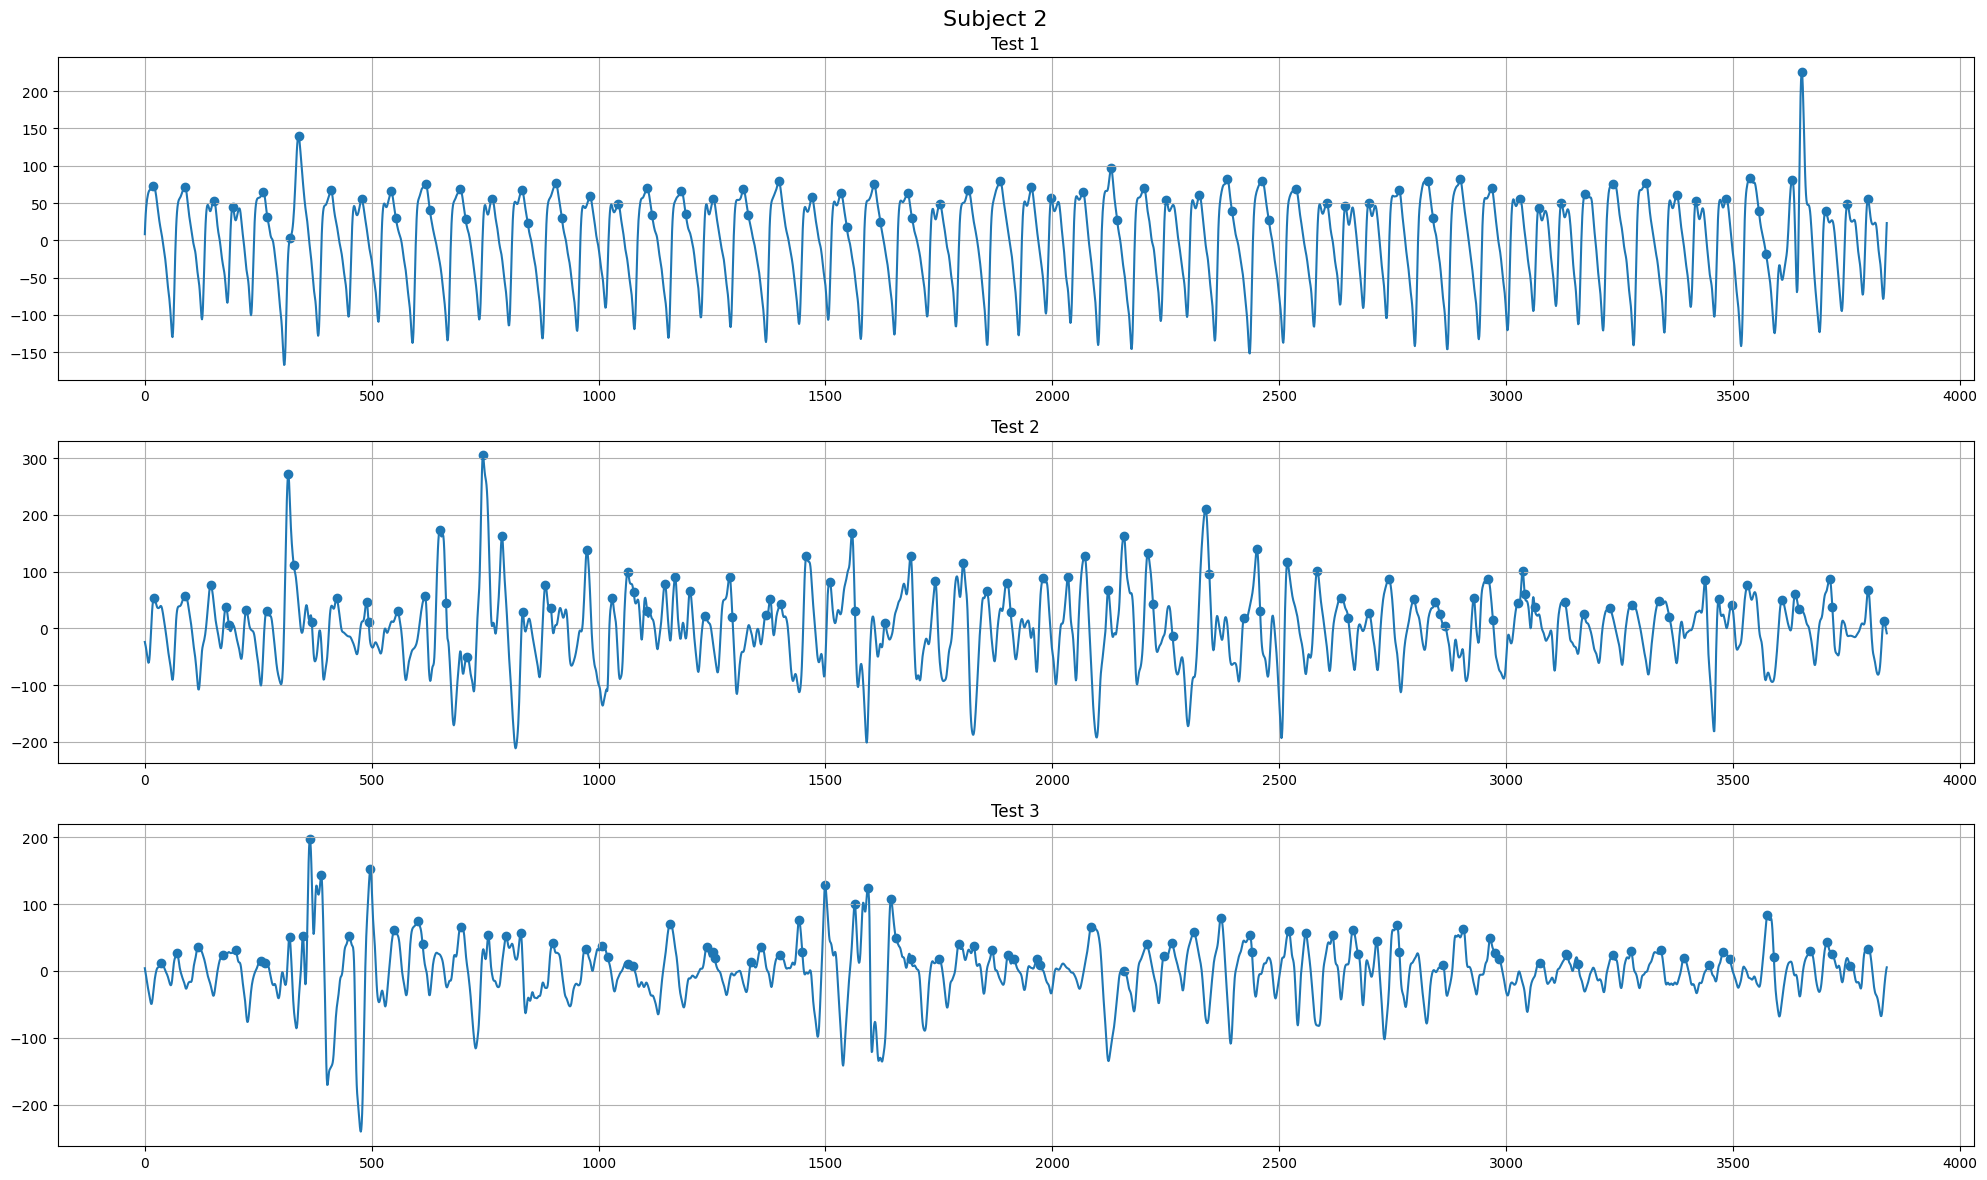

In [45]:
# remaining
plt_subject_tests(dataset, 2)
plt.show()

<Figure size 640x480 with 0 Axes>

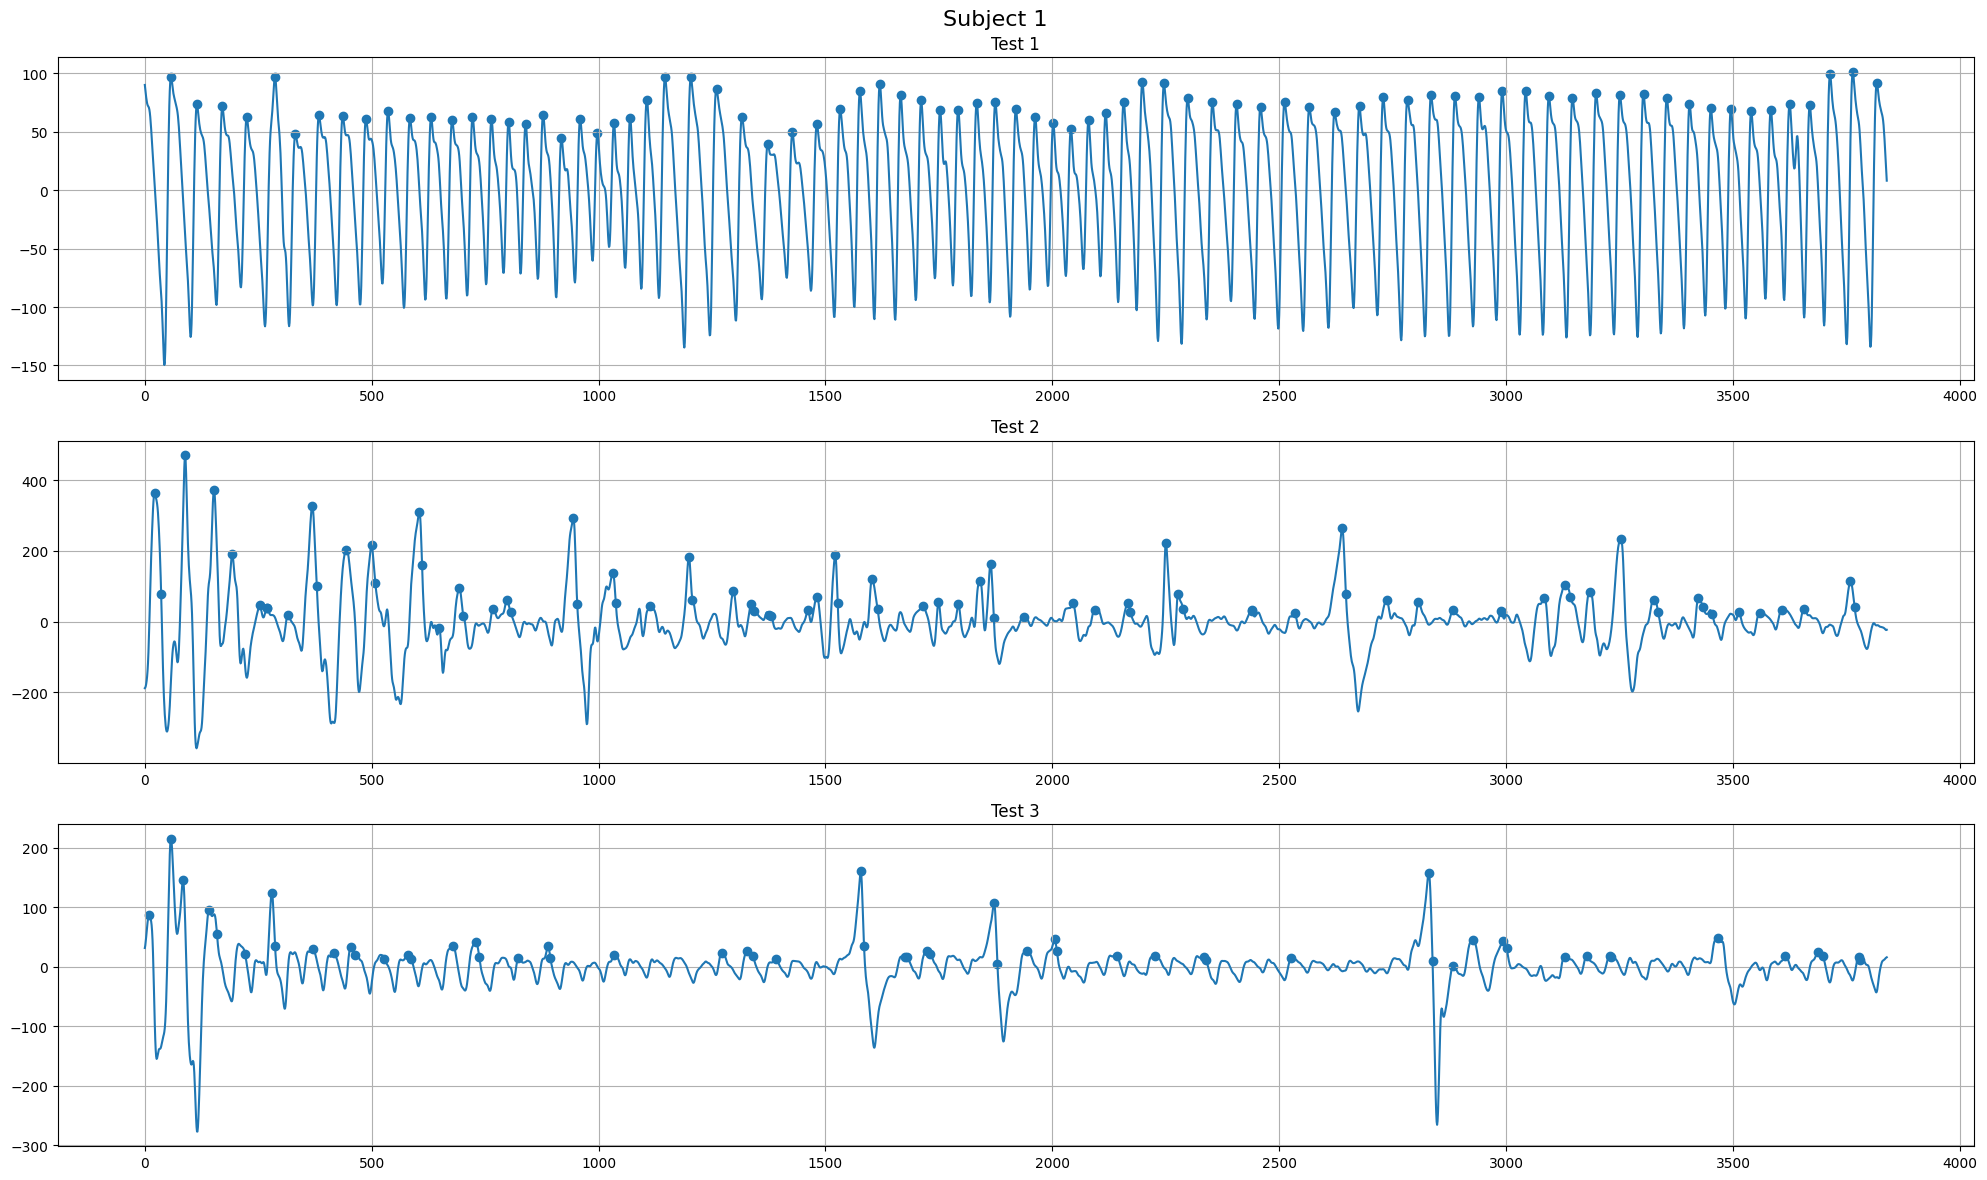

In [46]:
# eliminated
plt_subject_tests(dataset, 1)
plt.show()

<Figure size 640x480 with 0 Axes>

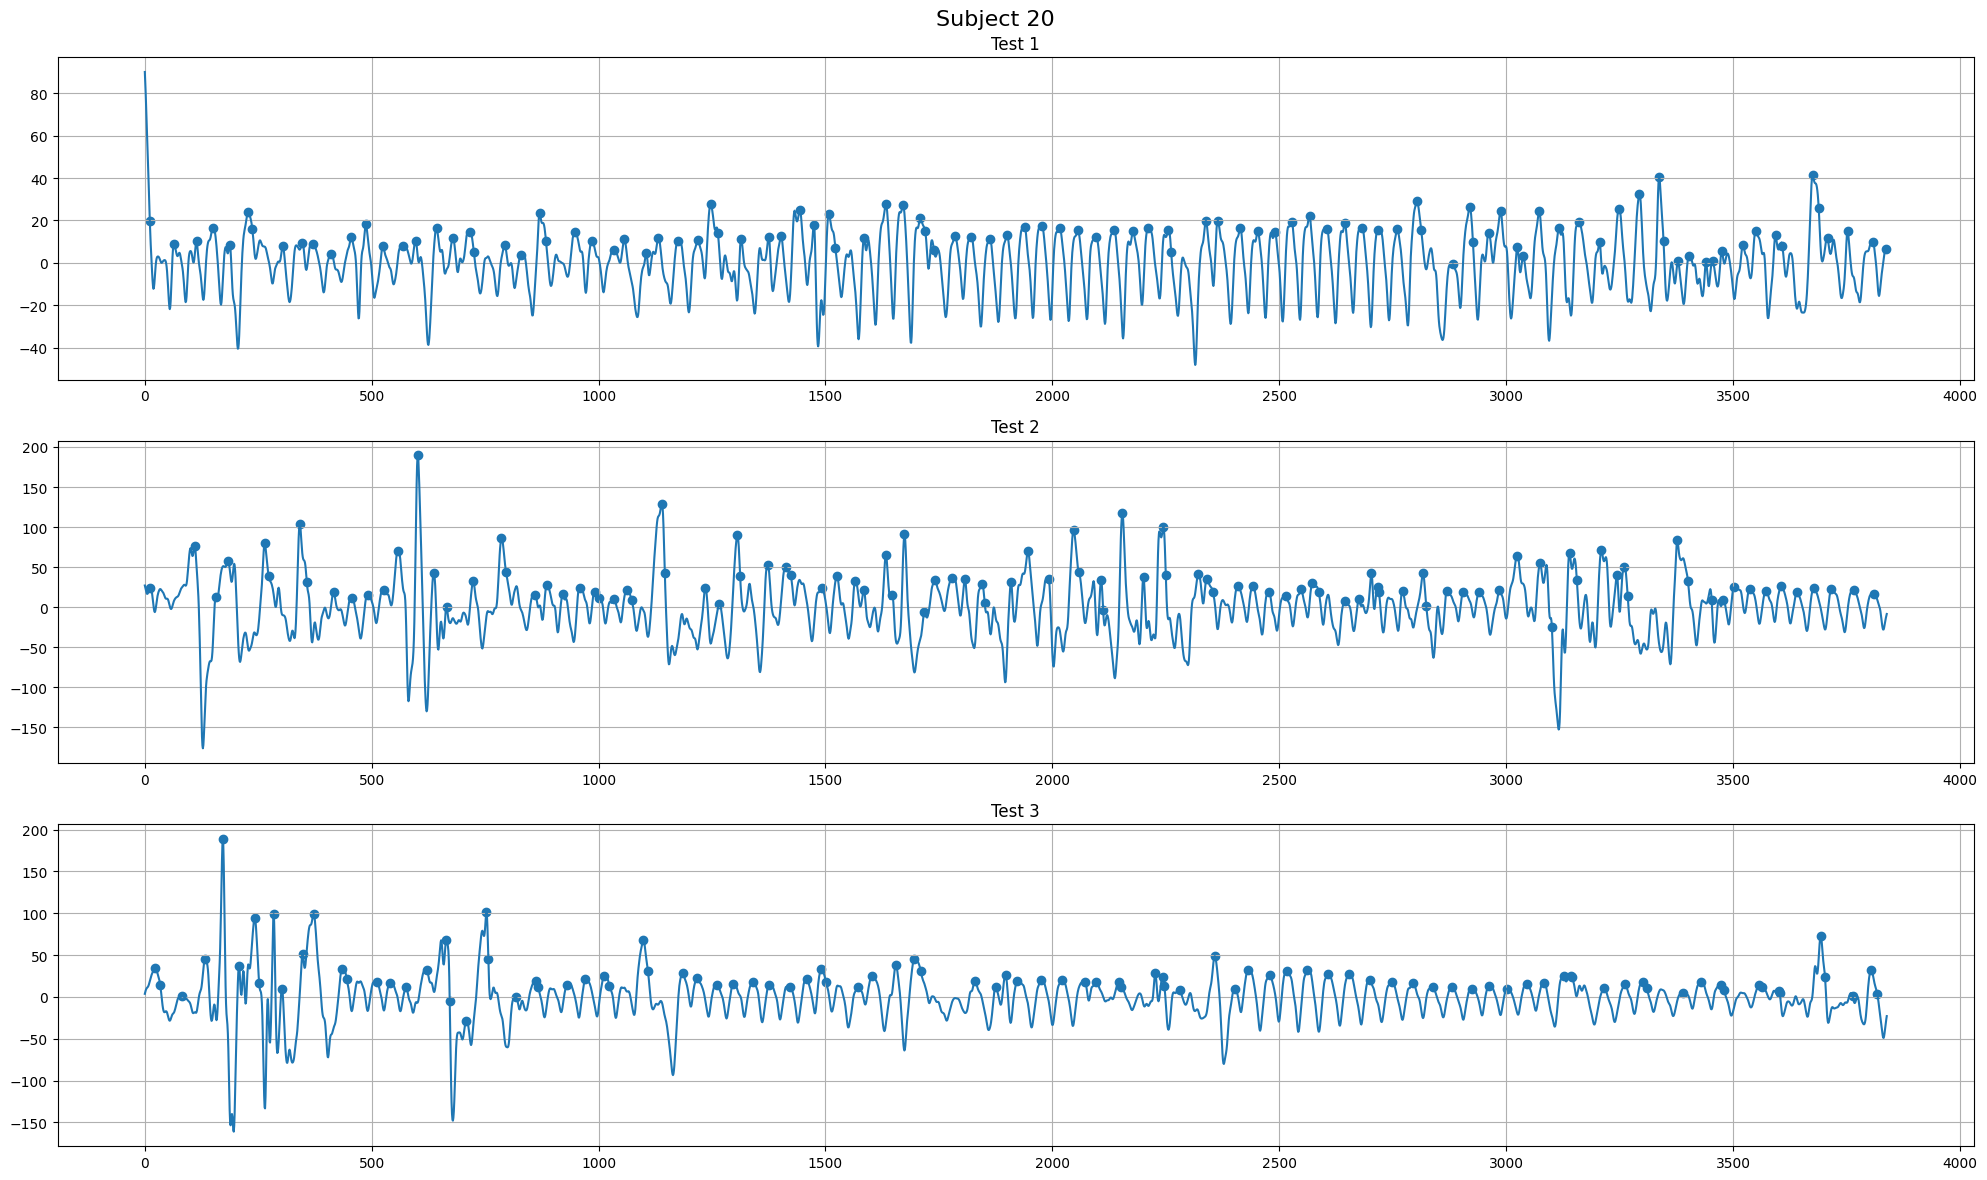

In [47]:
# remaining
plt_subject_tests(dataset, 20)
plt.show()

----

/tmp/ipykernel_94200/2475810308.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(3, 1, figsize=figsize)


<Figure size 640x480 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

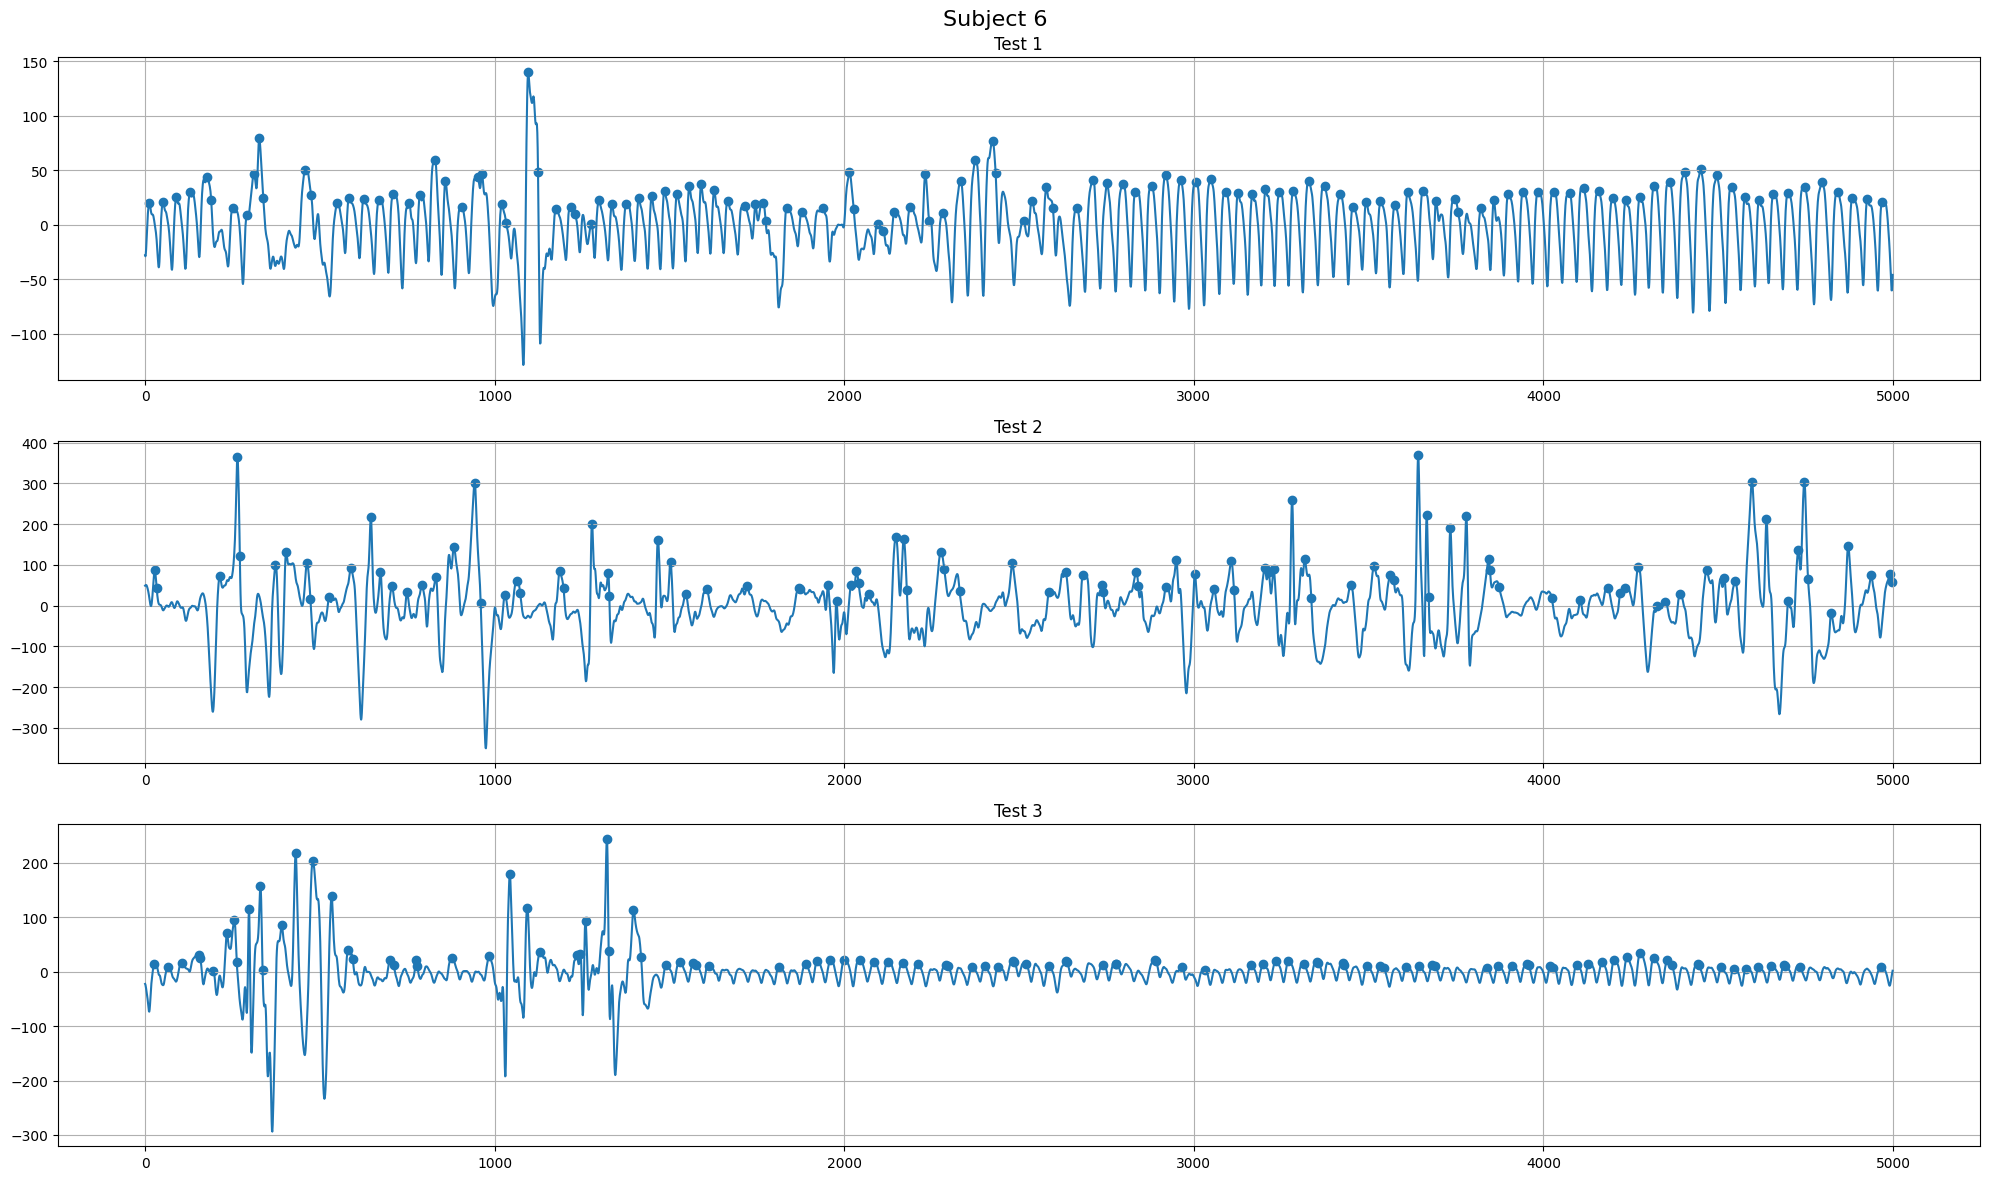

In [48]:
# --------------------------------------------------
for subject_id in dataset.subjects_tests.keys():
    plt_subject_tests(dataset, subject_id, show_range=5000)
    plt.savefig(f"data/ubfc-phys-2/bvp_plots/subject_{subject_id}.png")
    pass

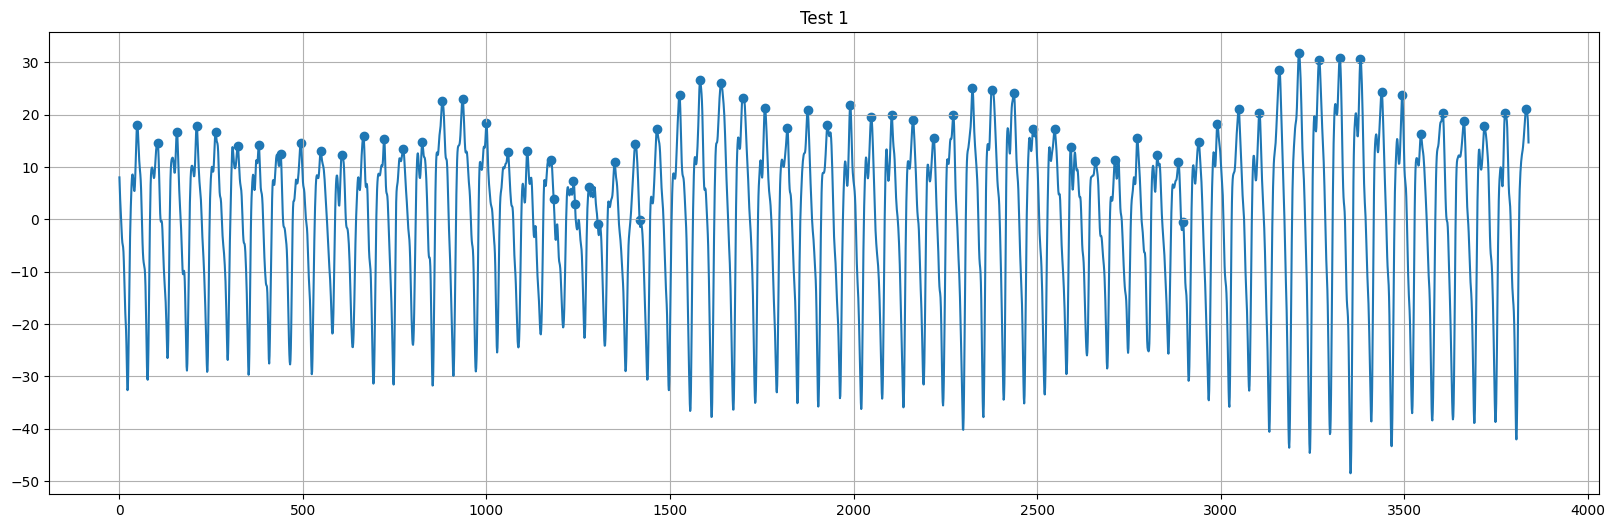

In [49]:
fig, ax = plt.subplots(figsize=(20, 6))
plt_subject_test(ax, dataset.get(29).test_1, 1)
plt.show()

In [50]:
from scipy import signal

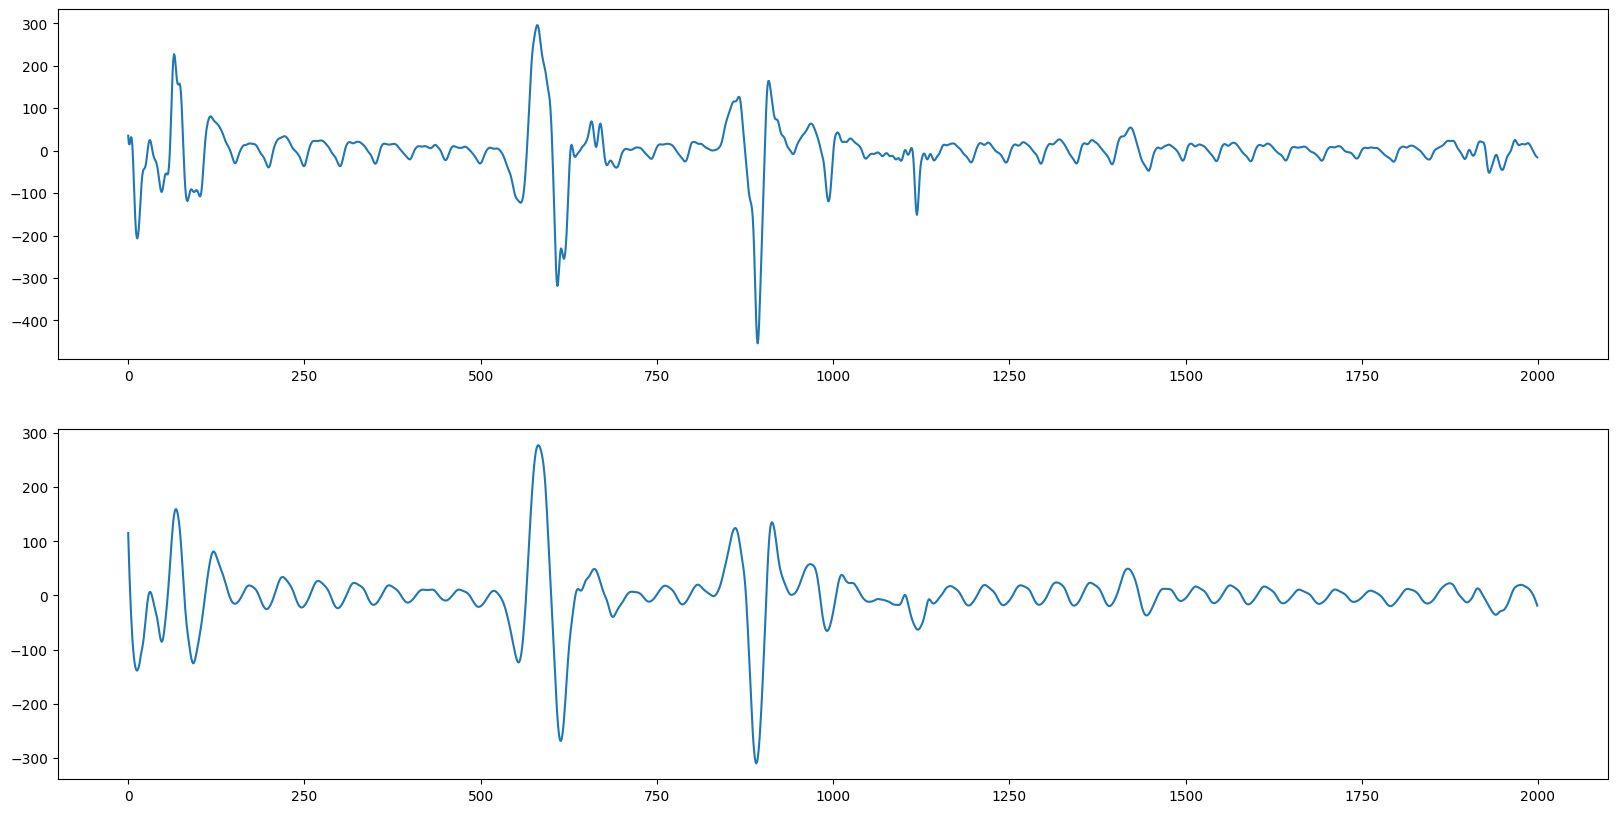

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
# plt_subject_test(ax[0], dataset.get(29).test_2, 2)
subject_test = dataset.get(29).test_2
st_data = subject_test.data[:2000]
filtered = signal.savgol_filter(st_data, 37, 3)
ax[0].plot(st_data)
ax[1].plot(filtered)
# s_t_peaks = np.array(subject_test.working_data.get("peaklist"))
# cropped = s_t_peaks[s_t_peaks < show_range]
# d_r = subject_test.data[:show_range]
# plt.show()

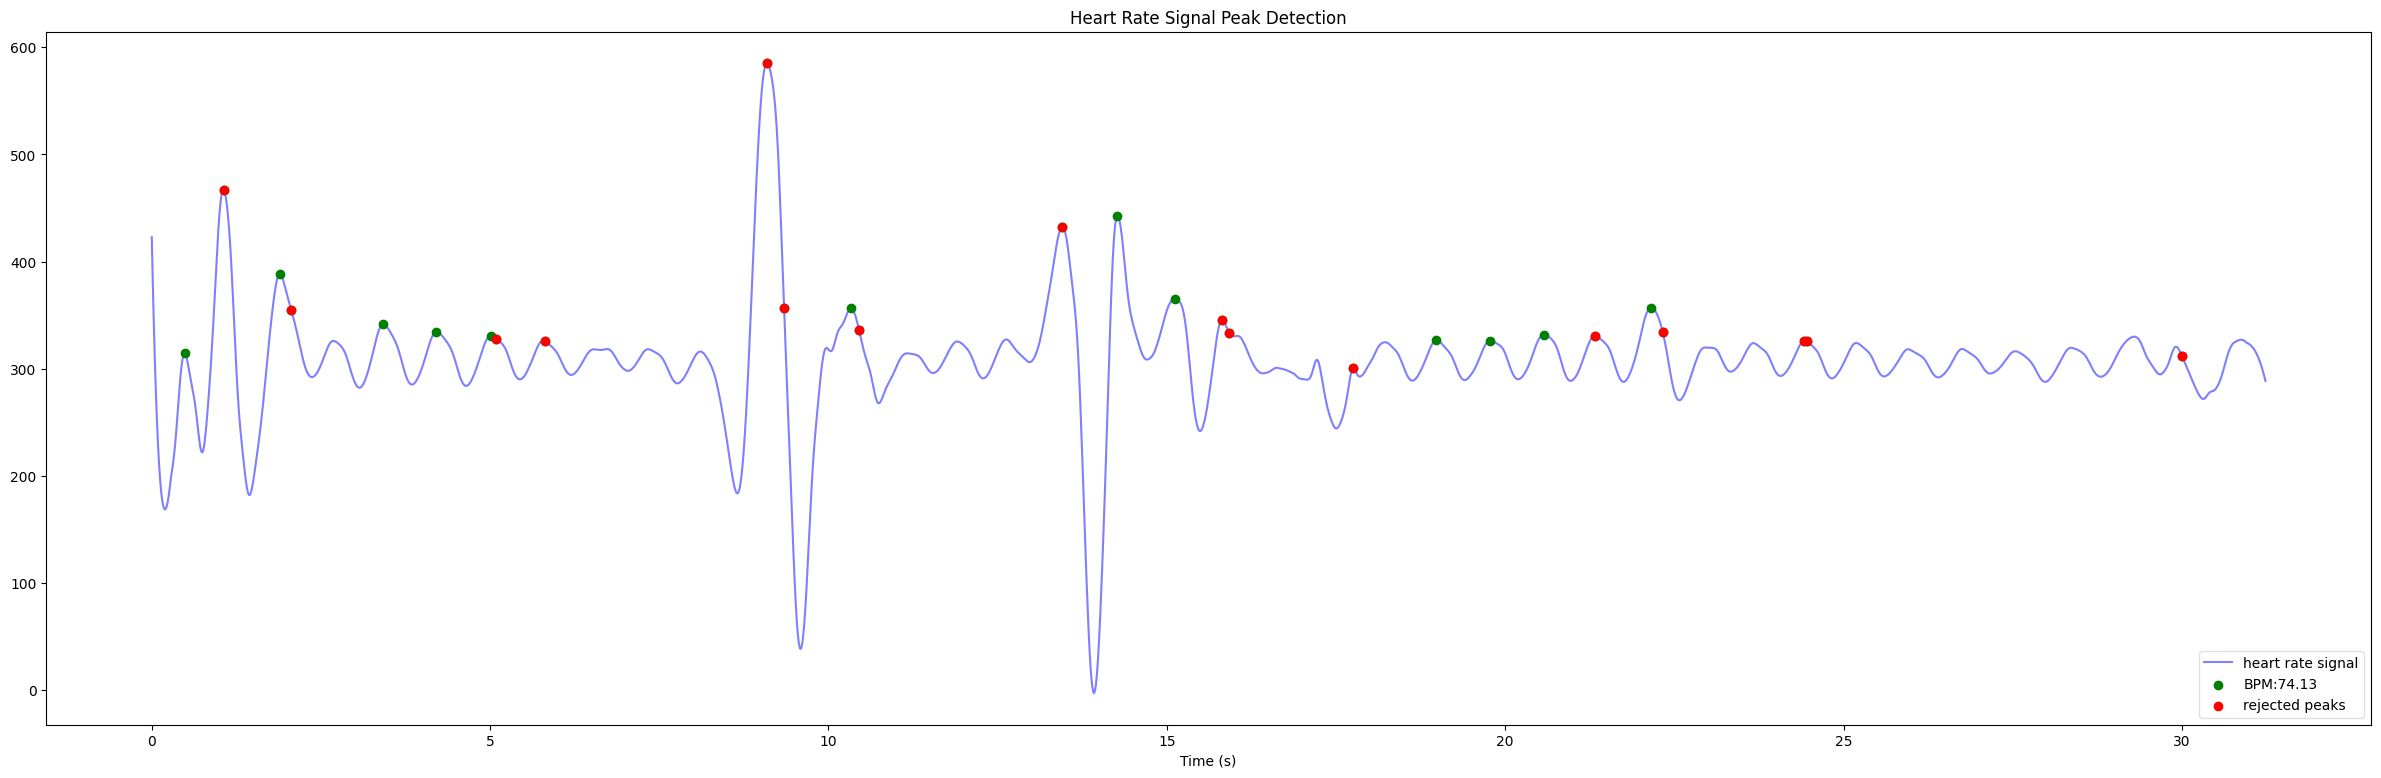

In [70]:
wd, m = hp.process(filtered, subject_test.sample_rate)
hp.plotter(wd, m, figsize=(30, 9))